## Подготовка: генерация коэффициентов и значений

In [ ]:
import scipy.stats as sts

In [ ]:
a = sts.randint.rvs(1, 100)
b = sts.randint.rvs(-77, 61)
c = sts.randint.rvs(-31, 10)
d = sts.randint.rvs(-17, 72)

In [ ]:
a, b, c, d

(80, 24, 7, -5)

In [ ]:
u_low = sts.randint.rvs(-8, 30)
u_up = sts.randint.rvs(-20, 5)

In [ ]:
u_low, u_up

(12, -13)

## Решение СЛАУ для нахождения неизвестных коэффициентов в решении ЛНДУ

In [1]:
import numpy as np

In [2]:
M1 = np.array([[1., np.exp(-3./5.)], [1., np.exp(-3)]])
v1 = np.array([12-10/24, -13-50/24])

In [3]:
np.linalg.solve(M1, v1)

array([-17.74383392,  53.43758282])

In [4]:
Y = lambda x: -17.74383392 + 53.43758282 * np.exp(-3. * x / 10.) + 5. * x / 24.

In [5]:
Y(2)

12.00000000302091

In [6]:
Y(10)

-12.999999997393934

## Анализ вычислительных экспериментов

Импорт необходимых библиотек для анализа и отрисовки графиков

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

plt.style.use('ggplot')

Функция для отрисовки графиков

In [85]:
from matplotlib.backends.backend_pdf import PdfPages

In [123]:
def show_solutions(filename, title):
    df = pd.read_csv(filename, names=['analystic', 'numerical', 'grid'])
    a = df['analystic'].to_numpy()
    num = df['numerical'].to_numpy()
    x = df['grid'].to_numpy()
    
    max_ape = max(abs((a - num)/a))
    mape = np.mean(abs((a - num)/a))
    mse = np.mean((a - num)**2)
    rmse = np.sqrt(np.mean((a - num)**2))
    mae = np.mean(abs(a - num))
    max_ae = max(abs(a - num))
    r2 = 1 - sum((a - num)**2)/sum((a - a.mean())**2)
    
    err = abs(a - num)
    ape = abs((a - num)/a)
    
    df_errors = pd.DataFrame({'metric': ['MAX APE', 'MAPE', 'MSE', 'RMSE', 'MAX AE', 'MAE', 'R2'], 
                              'value': [max_ape, mape, mse, rmse, max_ae, mae, r2]})
    
    plt.figure(figsize=(16, 7))
    plt.rcParams.update({'font.size': 20})
    plt.plot(x, a, marker='o', markersize=7, label='Аналитическое решение')
    plt.plot(x, num, marker='*', markersize=7, label='Численное решение')
    plt.title(f'{title}')
    plt.xlabel('x', fontsize=27)
    plt.ylabel('u', fontsize=27)
    plt.legend()
    with PdfPages(f'{title}.pdf') as pdf:
        pdf.savefig()
    plt.show()
    
    plt.figure(figsize=(16, 11))
    plt.subplot(2, 1, 1)
    plt.plot(x, err, label='Модуль абсолютной ошибки')
    plt.title(f'{title}')
    plt.xlabel('x', fontsize=27)
    plt.ylabel('error', fontsize=27)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(x, ape, label='Модуль относительной ошибки')
    plt.xlabel('x', fontsize=27)
    plt.ylabel('error', fontsize=27)
    plt.legend()
    with PdfPages(f'{title}_err.pdf') as pdf:
        pdf.savefig()
    plt.show()
    
    
    return df_errors

In [148]:
pd.options.display.float_format = '{:20,.6f}'.format

In [149]:
df = pd.read_csv('pow1_N5.csv', names=['analystic', 'numerical', 'grid'])
df

,analystic,numerical,grid
0,12.000000,12.000000,2.000000
1,1.153330,1.033439,3.600000
2,-5.431337,-5.558969,5.200000
3,-9.378747,-9.470445,6.800000
4,-11.694267,-11.738769,8.400000
5,-13.000000,-13.000000,10.000000


### Графики, демонстрирующие решения

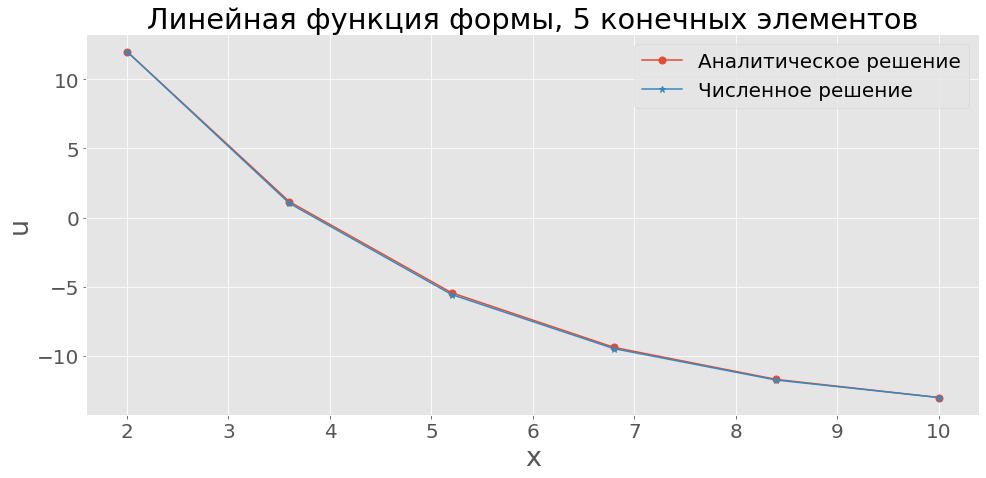

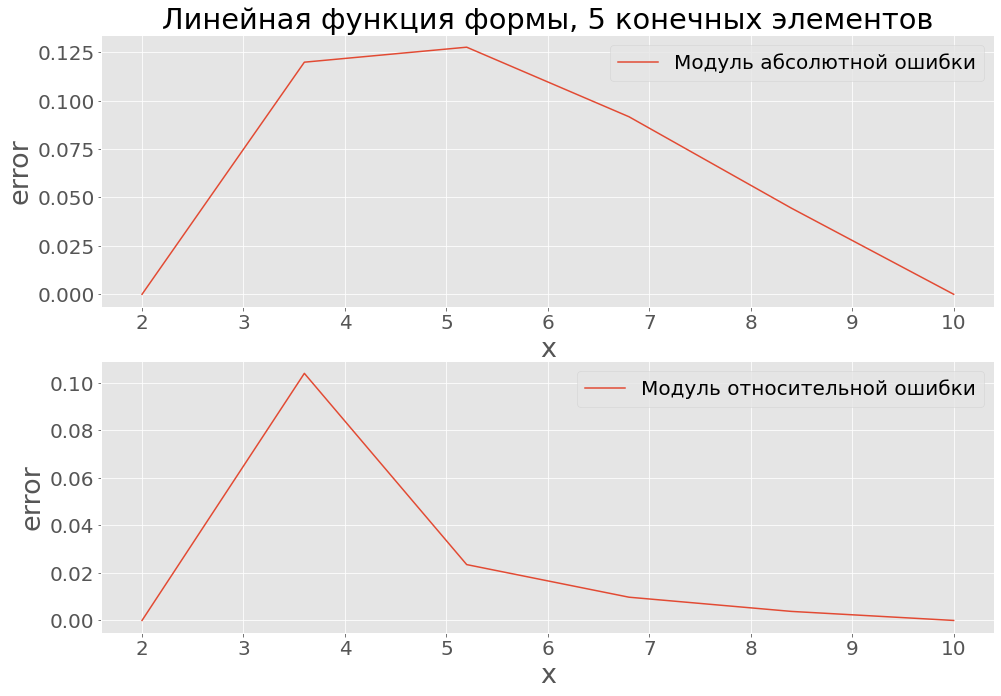

In [150]:
df_errors_15 = show_solutions('pow1_N5.csv', 'Линейная функция формы, 5 конечных элементов')

In [151]:
df_errors_15

,metric,value
0,MAX APE,0.103952
1,MAPE,0.023506
2,MSE,0.006842
3,RMSE,0.082717
4,MAX AE,0.127632
5,MAE,0.063954
6,R2,0.999909


In [152]:
df_errors_15.to_csv('df_errors_15.csv', index=False)

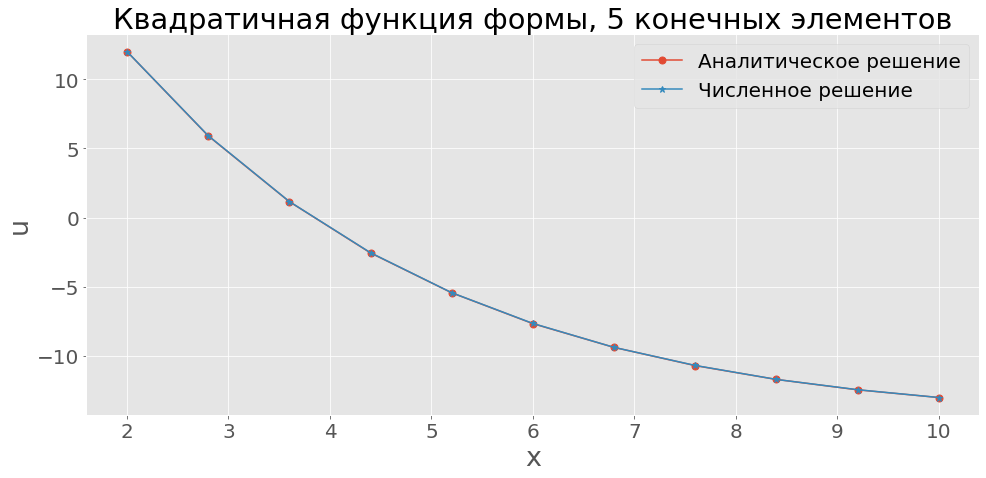

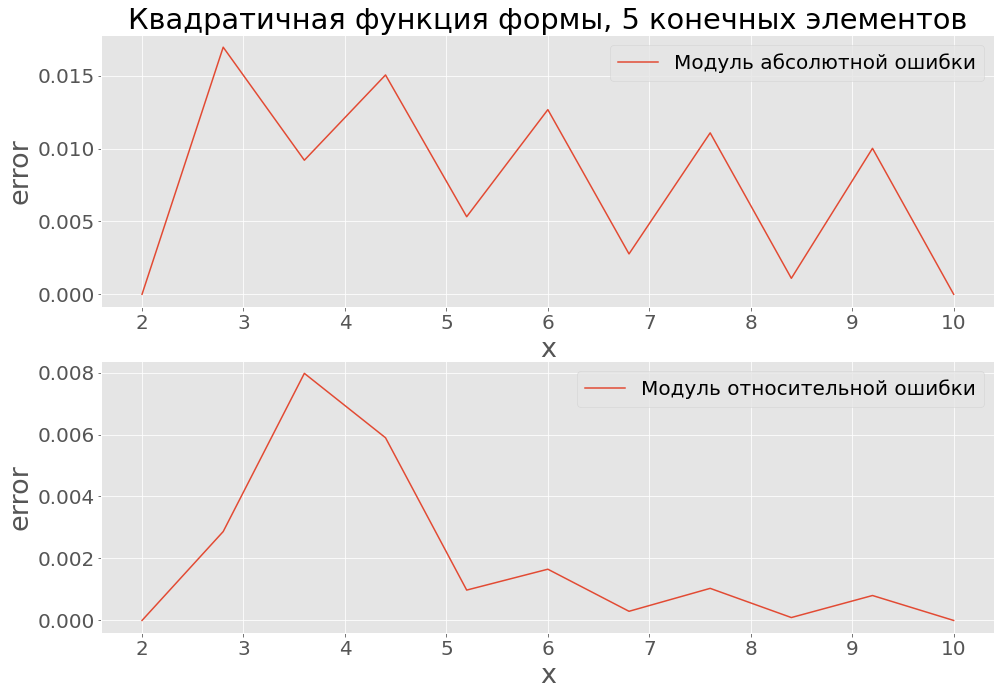

In [153]:
df_errors_25 = show_solutions('pow2_N5.csv', 'Квадратичная функция формы, 5 конечных элементов')

In [154]:
df_errors_25

,metric,value
0,MAX APE,0.007973
1,MAPE,0.001964
2,MSE,0.000093
3,RMSE,0.009623
4,MAX AE,0.016949
5,MAE,0.007648
6,R2,0.999998


In [155]:
df_errors_25.to_csv('df_errors_25.csv', index=False)

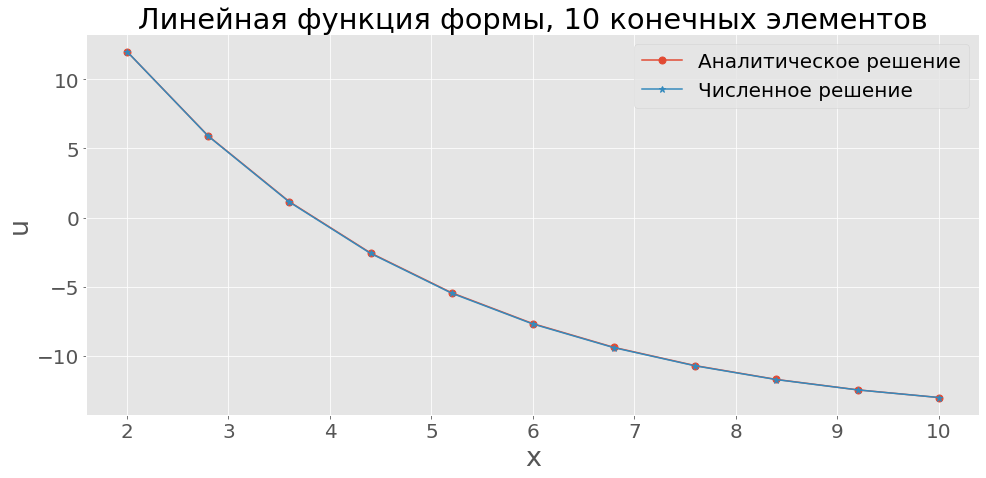

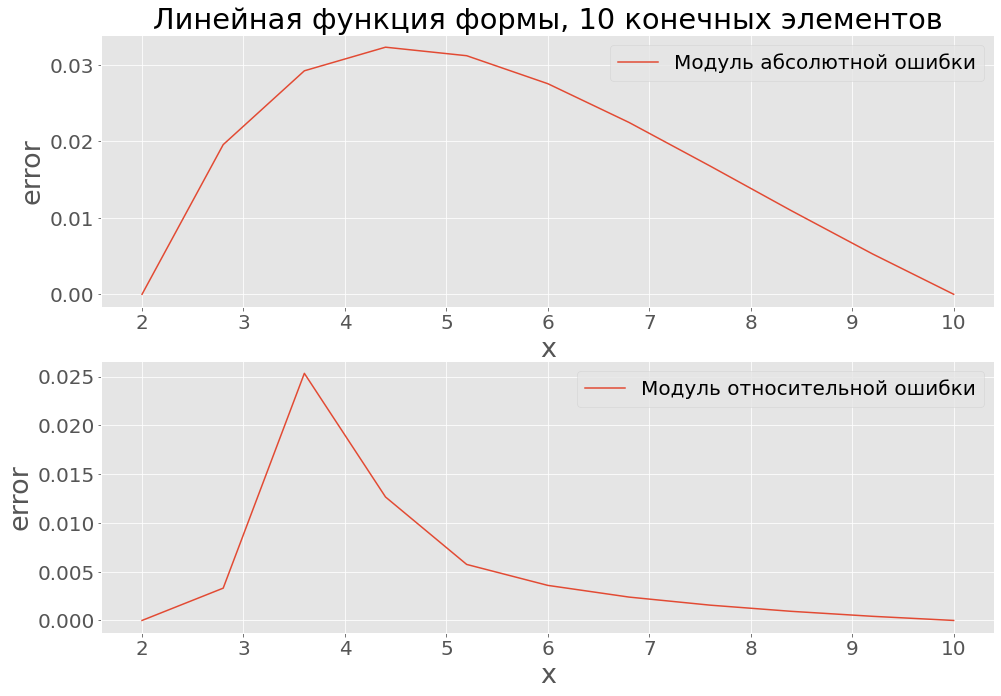

In [157]:
df_errors_110 = show_solutions('pow1_N10.csv', 'Линейная функция формы, 10 конечных элементов')

In [158]:
df_errors_110

,metric,value
0,MAX APE,0.025324
1,MAPE,0.005085
2,MSE,0.000449
3,RMSE,0.021192
4,MAX AE,0.032292
5,MAE,0.017743
6,R2,0.999993


In [176]:
df_errors_110.to_csv('df_errors_110.csv', index=False, float_format='%.6f')

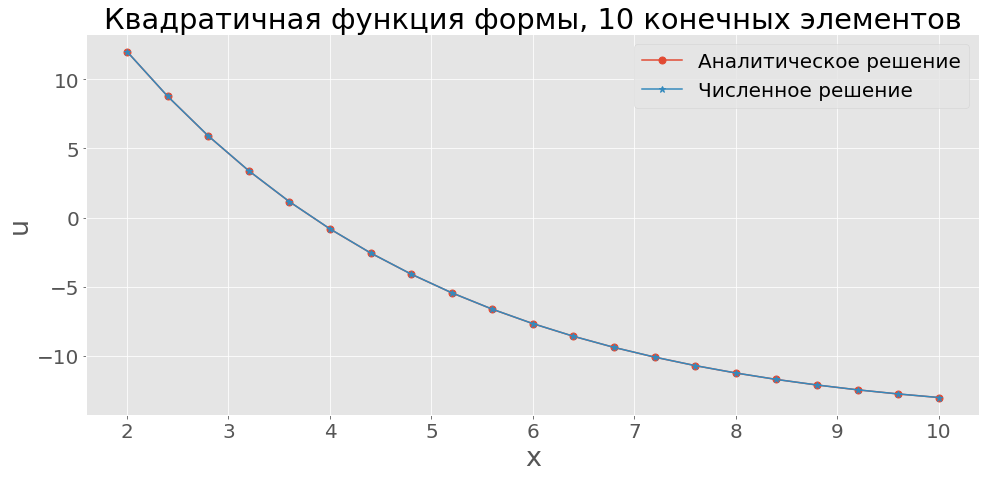

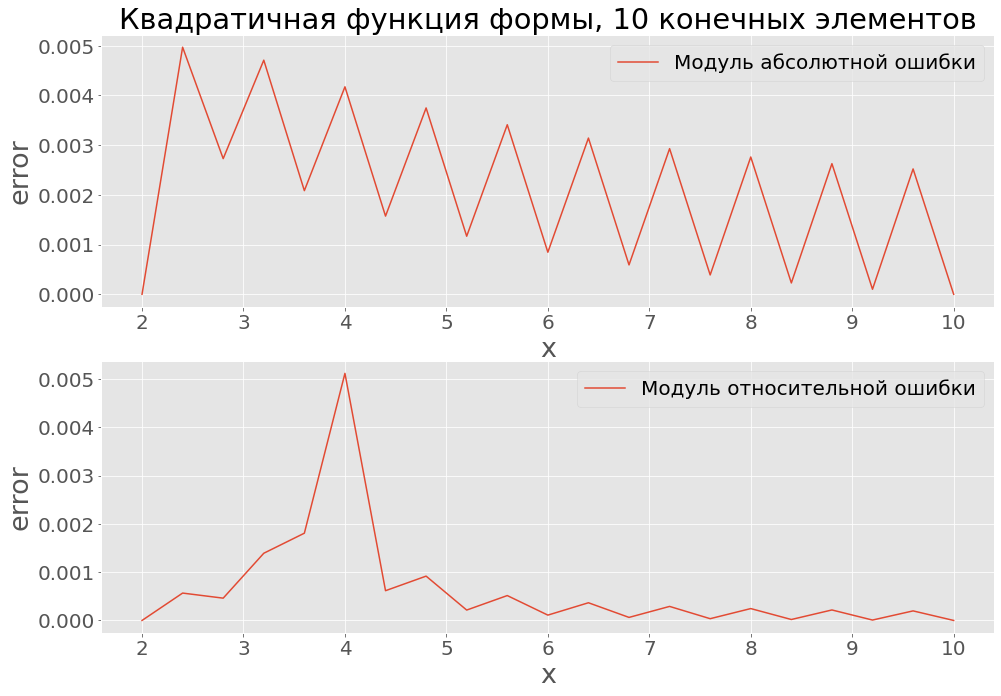

In [160]:
df_errors_210 = show_solutions('pow2_N10.csv', 'Квадратичная функция формы, 10 конечных элементов')

In [161]:
df_errors_210

,metric,value
0,MAX APE,0.005119
1,MAPE,0.000627
2,MSE,0.000007
3,RMSE,0.002639
4,MAX AE,0.004971
5,MAE,0.002129
6,R2,1.000000


In [177]:
df_errors_210.to_csv('df_errors_210.csv', index=False,  float_format='%.6f')

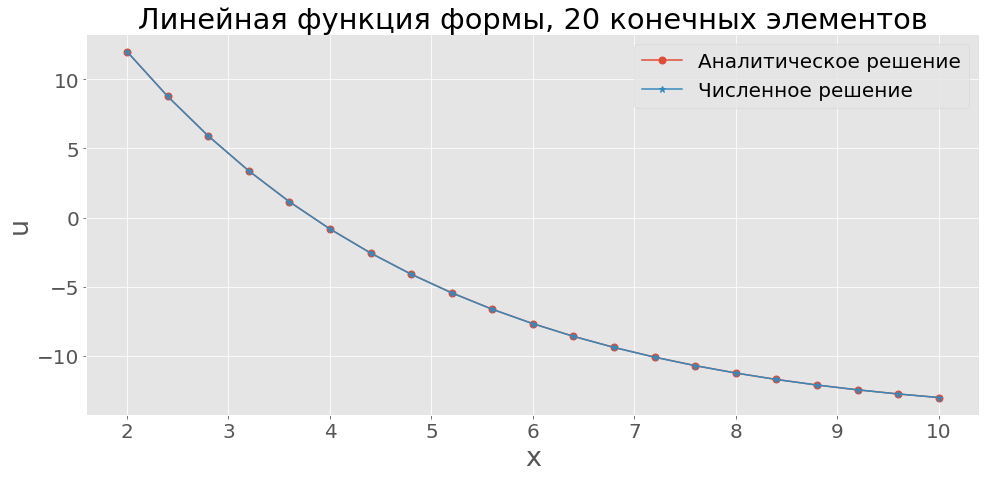

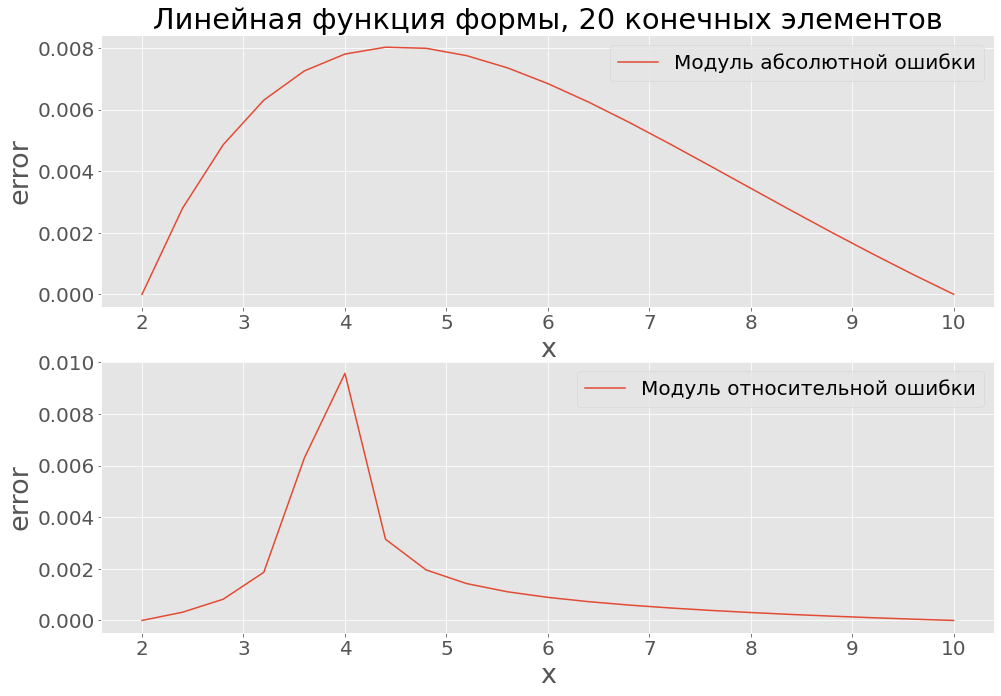

In [163]:
df_errors_120 = show_solutions('pow1_N20.csv', 'Линейная функция формы, 20 конечных элементов')

In [164]:
df_errors_120

,metric,value
0,MAX APE,0.009568
1,MAPE,0.001450
2,MSE,0.000029
3,RMSE,0.005393
4,MAX AE,0.008025
5,MAE,0.004666
6,R2,0.999999


In [178]:
df_errors_120.to_csv('df_errors_120.csv', index=False,  float_format='%.6f')

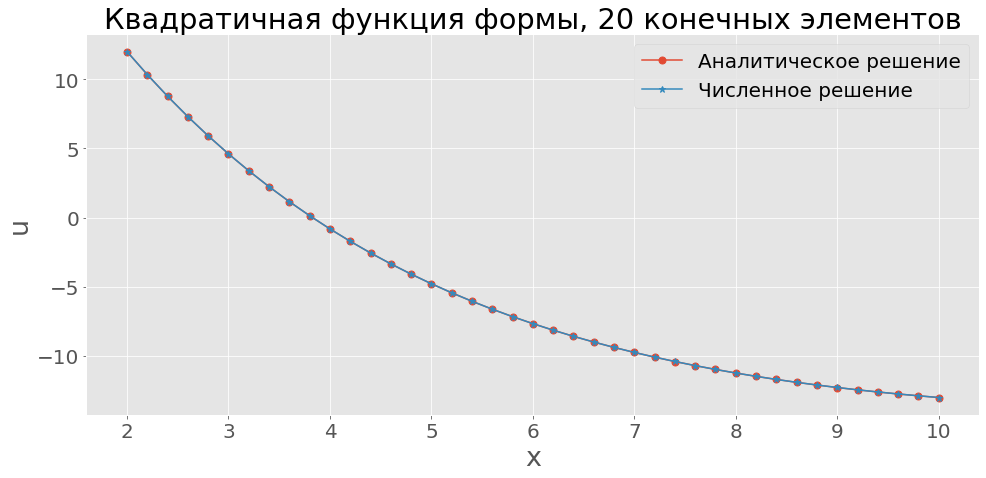

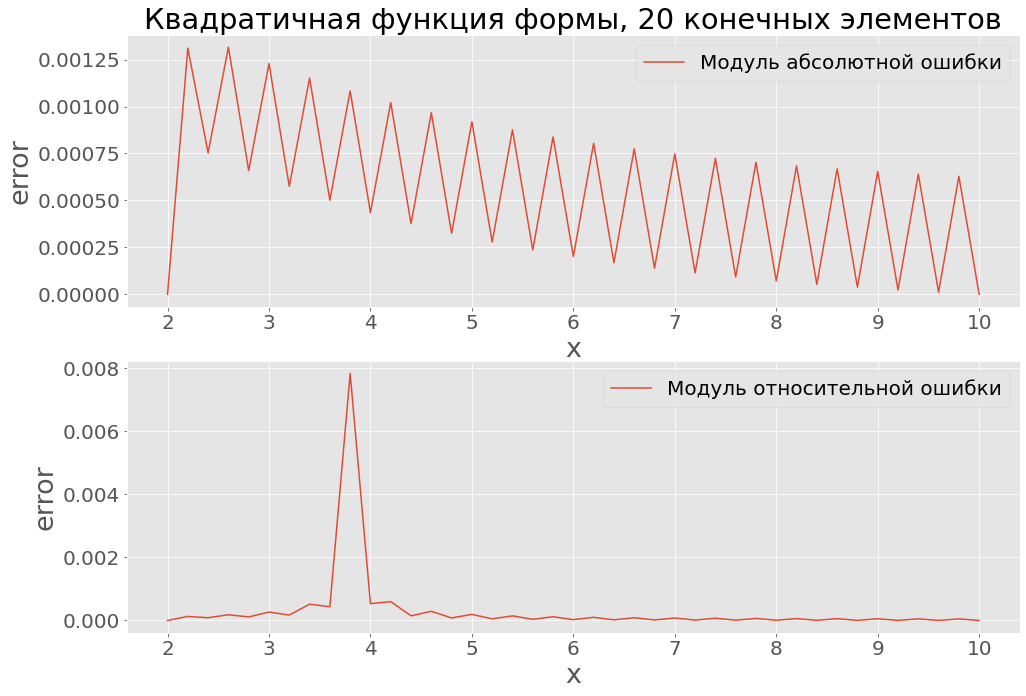

In [166]:
df_errors_220 = show_solutions('pow2_N20.csv', 'Квадратичная функция формы, 20 конечных элементов')

In [167]:
df_errors_220

,metric,value
0,MAX APE,0.007837
1,MAPE,0.000309
2,MSE,0.000000
3,RMSE,0.000681
4,MAX AE,0.001316
5,MAE,0.000556
6,R2,1.000000


In [179]:
df_errors_220.to_csv('df_errors_220.csv', index=False,  float_format='%.6f')

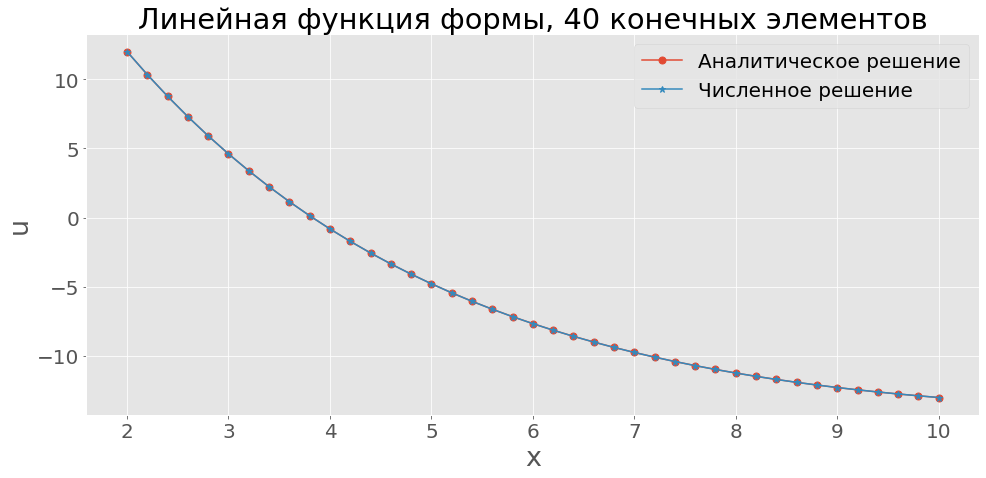

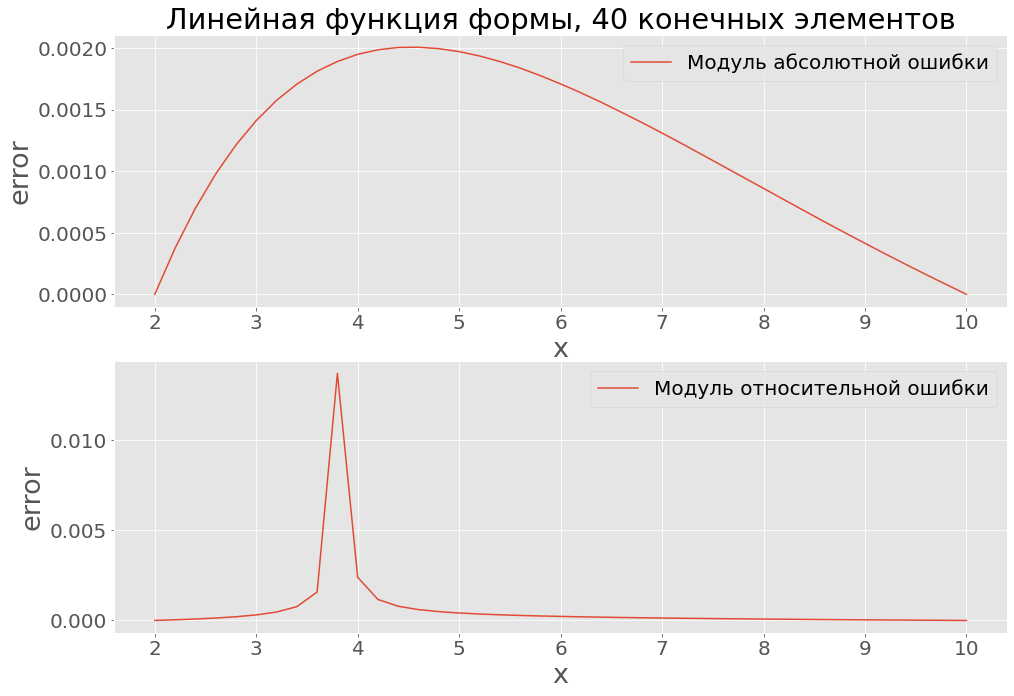

In [169]:
df_errors_140 = show_solutions('pow1_N40.csv', 'Линейная функция формы, 40 конечных элементов')

In [170]:
df_errors_140

,metric,value
0,MAX APE,0.013677
1,MAPE,0.000637
2,MSE,0.000002
3,RMSE,0.001363
4,MAX AE,0.002006
5,MAE,0.001196
6,R2,1.000000


In [180]:
df_errors_140.to_csv('df_errors_140.csv', index=False,  float_format='%.6f')

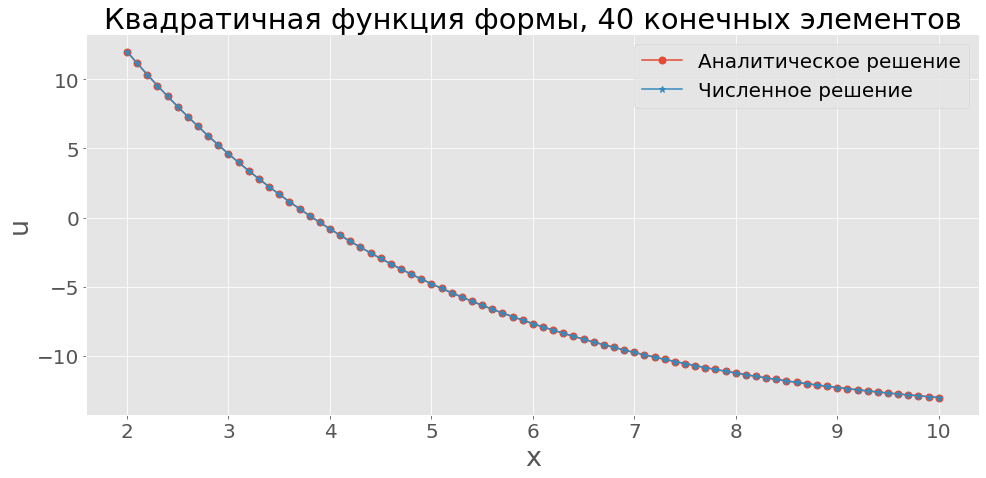

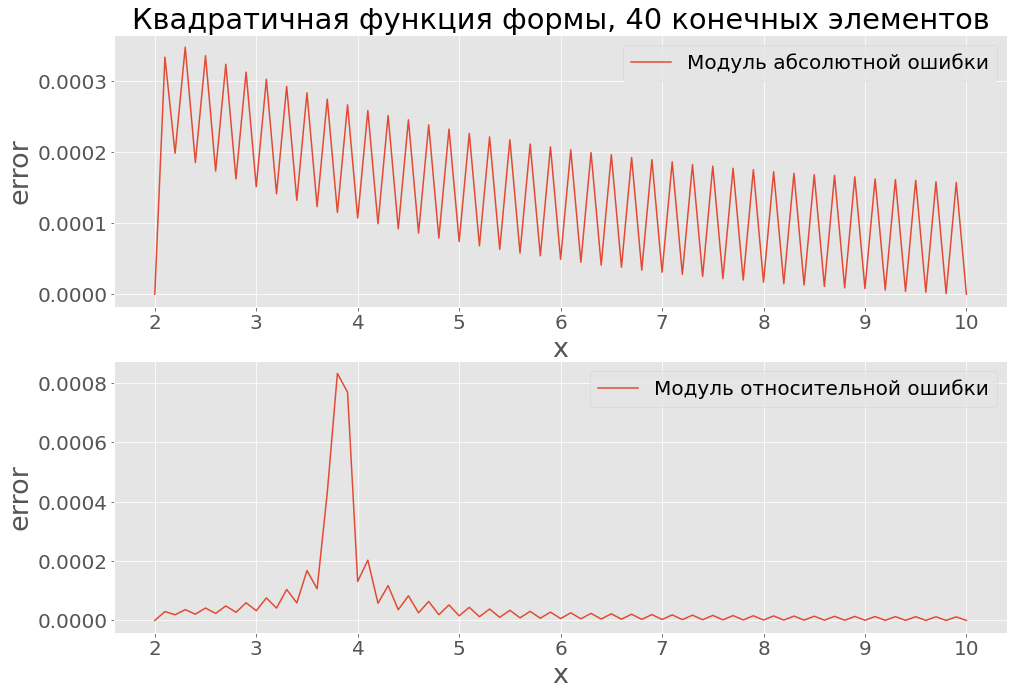

In [172]:
df_errors_240 = show_solutions('pow2_N40.csv', 'Квадратичная функция формы, 40 конечных элементов')

In [173]:
df_errors_240

,metric,value
0,MAX APE,0.000832
1,MAPE,0.000053
2,MSE,0.000000
3,RMSE,0.000172
4,MAX AE,0.000347
5,MAE,0.000142
6,R2,1.000000


In [181]:
df_errors_240.to_csv('df_errors_240.csv', index=False,  float_format='%.6f')

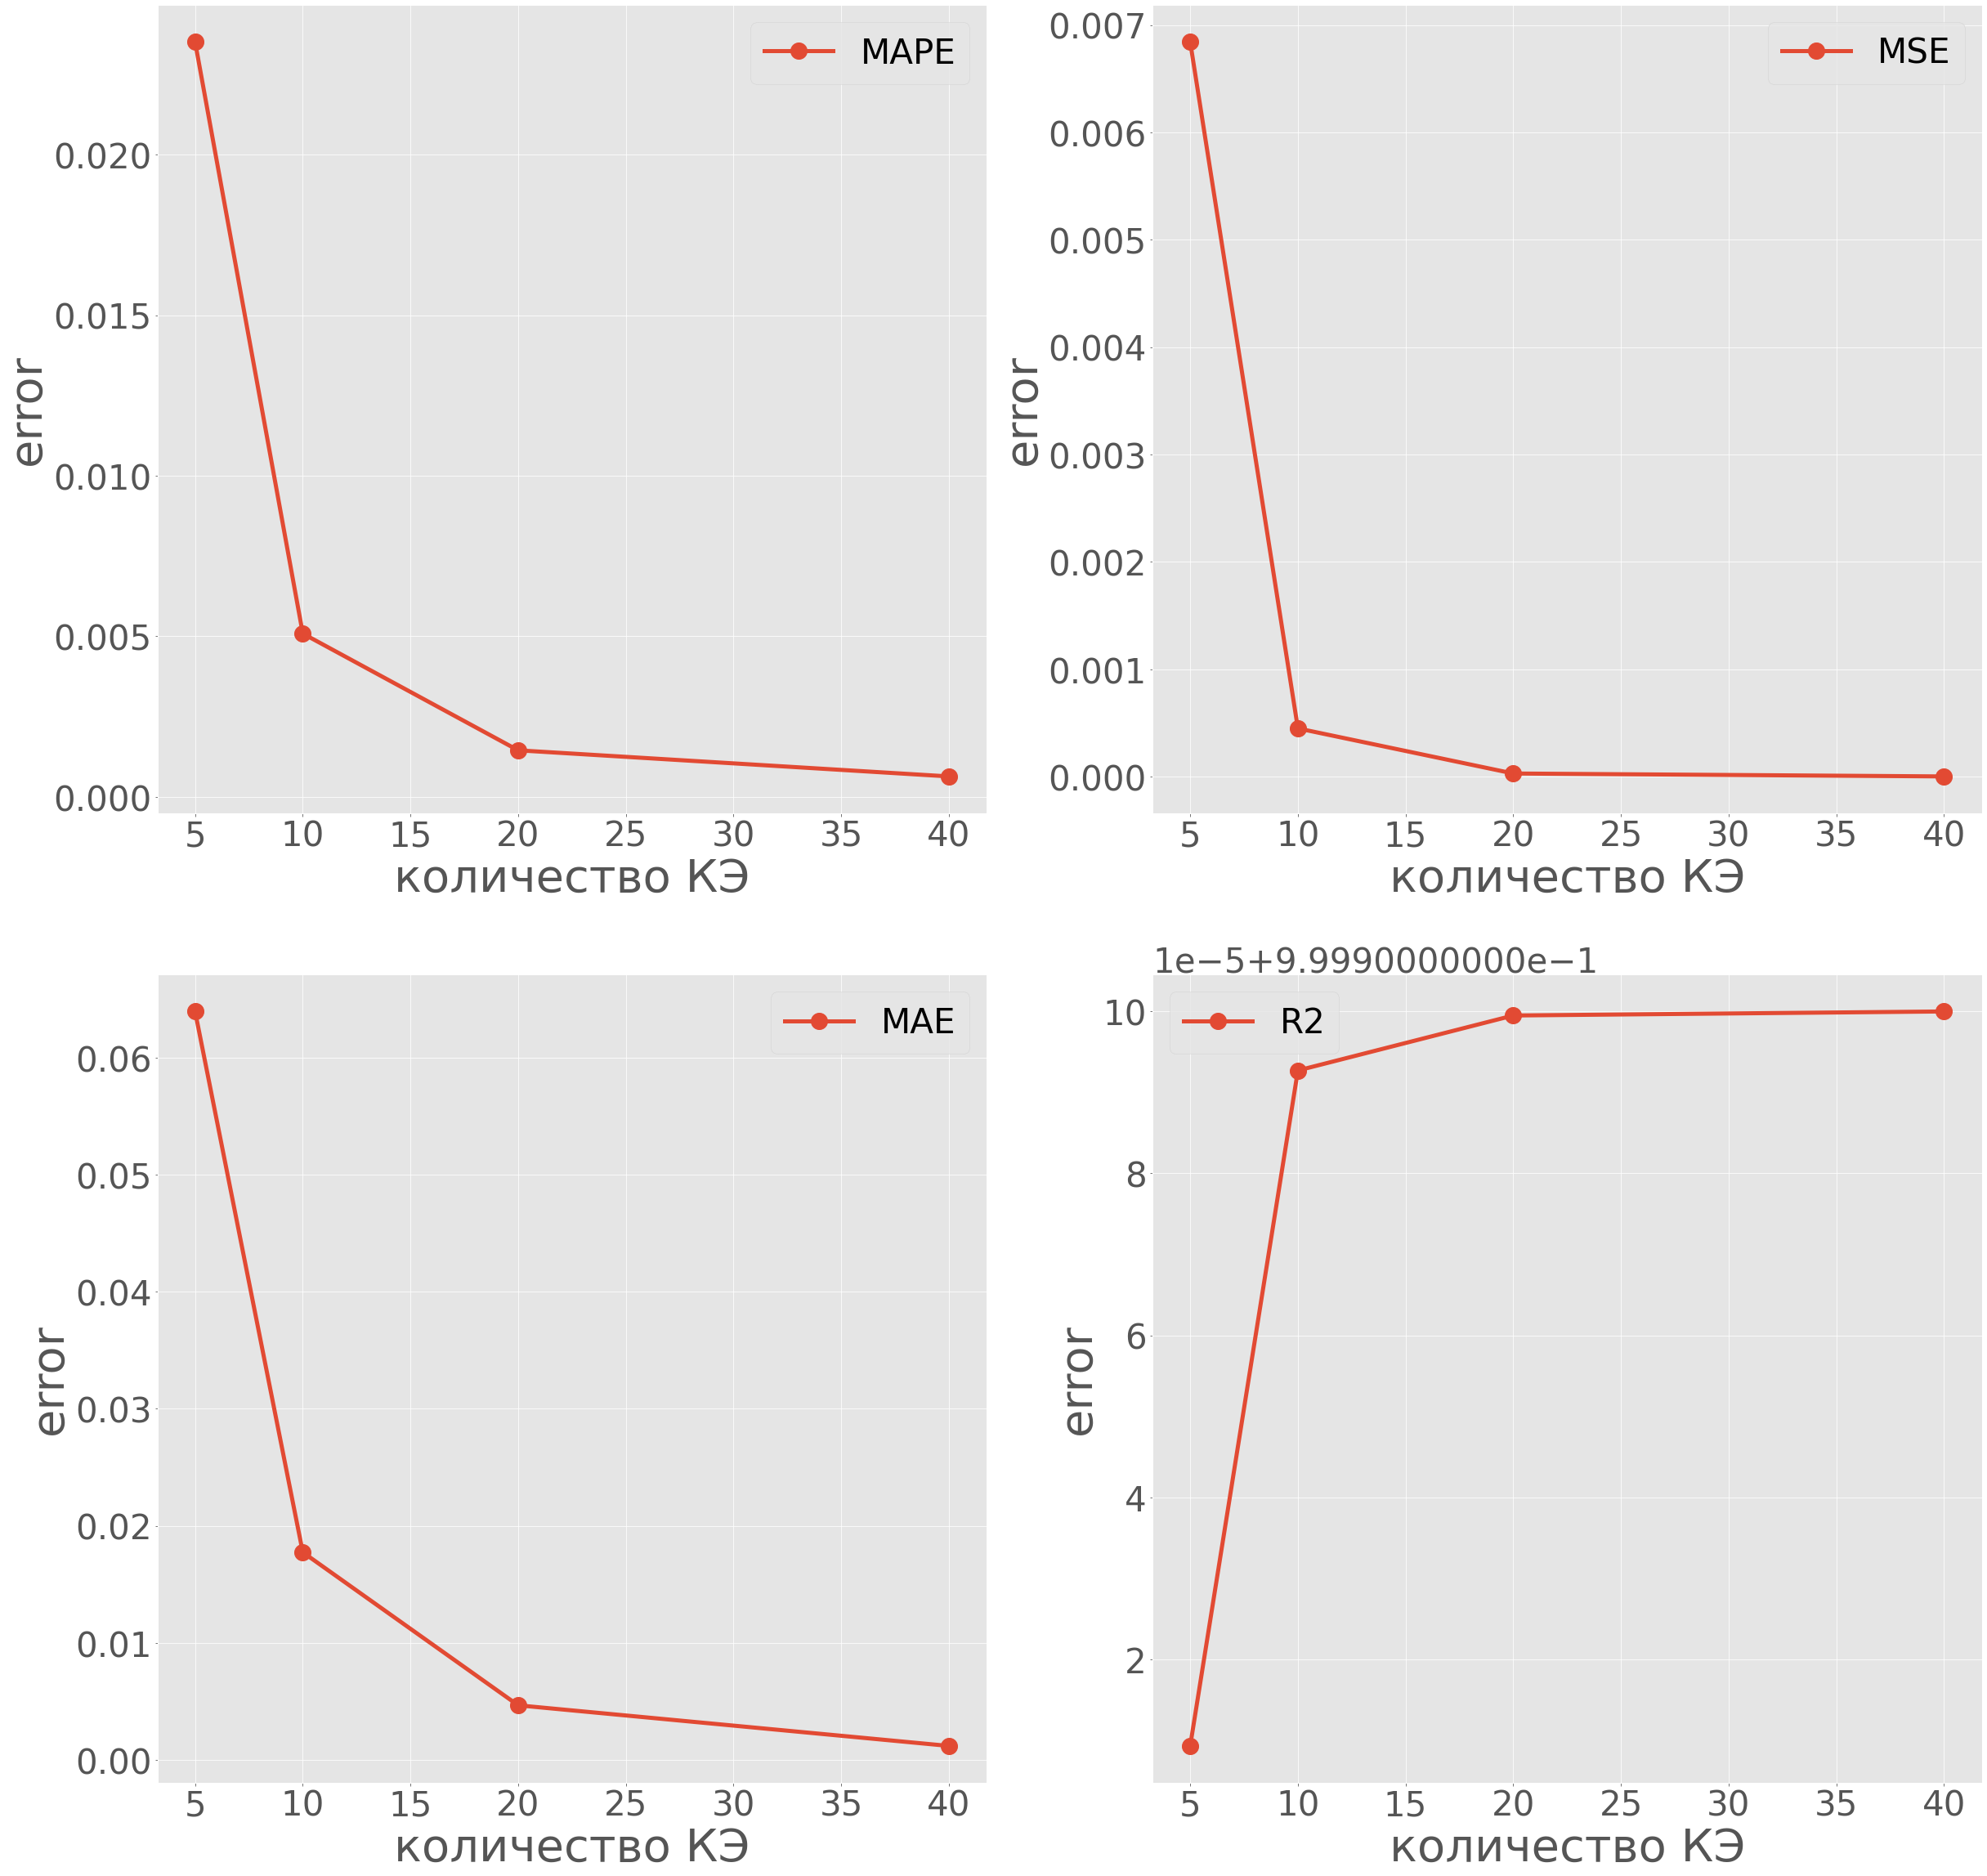

In [147]:
N = [5, 10, 20, 40]
dfs = [df_errors_15, df_errors_110, df_errors_120, df_errors_140]
names = ['MAPE', 'MSE', 'MAE', 'R2']
fig = plt.figure(figsize=(40, 40))

for i in range(4):
    y = []
    for df in dfs:
        y.append(df[df['metric']==f'{names[i]}']['value'])
    plt.subplot(2, 2, i + 1)
    plt.rcParams.update({'font.size': 42})
    plt.plot(N, y, marker='o', label=f'{names[i]}', linewidth=5, markersize=20)
    plt.xlabel('количество КЭ', fontsize=56)
    plt.ylabel('error', fontsize=56)
    plt.legend()
    with PdfPages(f'линейная.pdf') as pdf:
        pdf.savefig()

### Пункт 13

Функции для интерполяции Лагранжа

In [48]:
def l_i(i, x, x_nodes):
    n = len(x_nodes)
    p = 1

    for j in range(n):
        if j != i:
            p *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
    
    return p

In [49]:
def Lagrange(x, x_nodes, y_nodes):
    n = len(x_nodes)
    s = 0

    for i in range(n):
        s += y_nodes[i] * l_i(i, x, x_nodes)

    return s

Алгоритм для вычисления интепрполяционных полиномов на основе значений в узлах, полученных с помощью решения ДУЧП с помощью МКЭ

In [193]:
df = pd.read_csv(f'pow2_N40.csv', names=['analystic', 'numerical', 'grid'])
a = df['analystic'].to_numpy()
num = df['numerical'].to_numpy()
grid = df['grid'].to_numpy()
knots = 300
x = np.linspace(2, 10, knots, endpoint=True)
step = 2
f2 = []
for i in range(0, len(num)-1, step):
    u = num[i:i+1+step]
    g = grid[i:i+1+step]
    for j in range(0, knots):
        if x[j] <= grid[i+step] and x[j] >= grid[i]:
            f2.append(Lagrange(x[j], g, u))

Демонстрация погрешностей

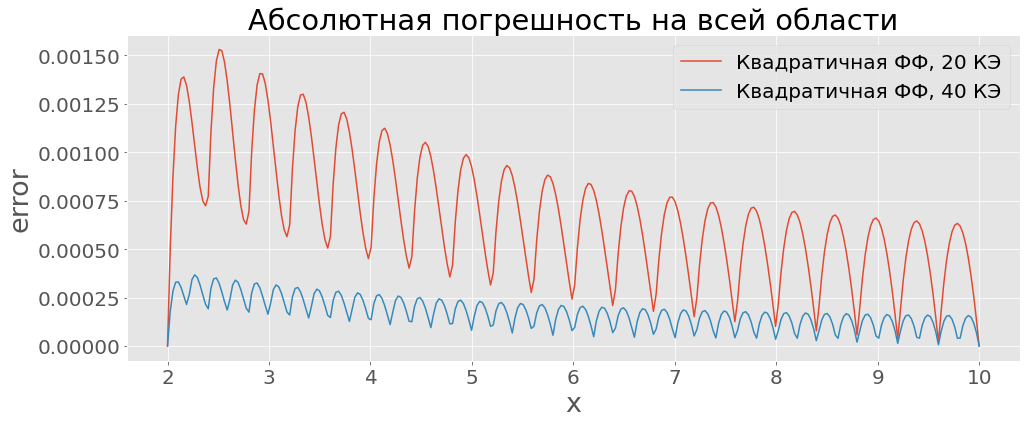

In [207]:
fig = plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 20})
plt.plot(x,(abs(f1 - y)), label='Квадратичная ФФ, 20 КЭ')
plt.plot(x,(abs(f2 - y)), label='Квадратичная ФФ, 40 КЭ')
plt.title('Абсолютная погрешность на всей области')
plt.xlabel('x', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.legend()
plt.savefig('пункт_13б_абсолютная.png')
plt.show()

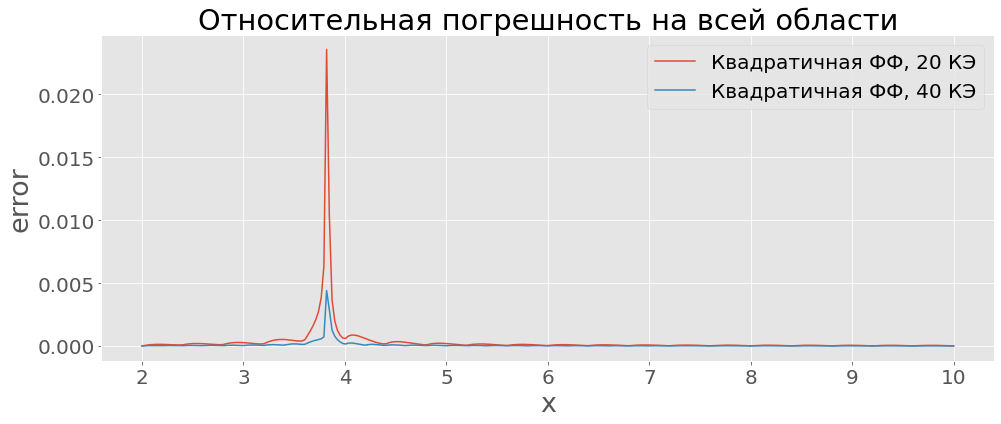

In [208]:
fig = plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 20})
plt.plot(x,(abs(f1 - y)/abs(y)), label='Квадратичная ФФ, 20 КЭ')
plt.plot(x,(abs(f2 - y)/abs(y)), label='Квадратичная ФФ, 40 КЭ')
plt.title('Относительная погрешность на всей области')
plt.xlabel('x', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.legend()
plt.savefig('пункт_13б_относительная.png')
plt.show()

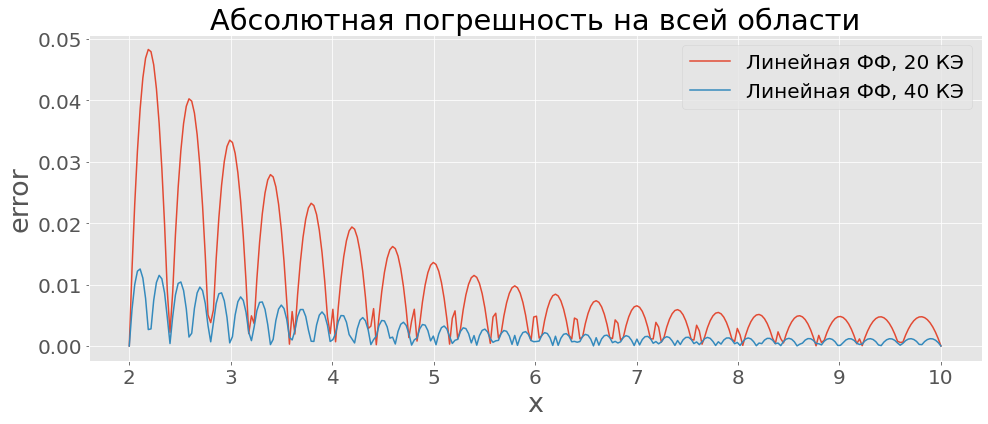

In [209]:
fig = plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 20})
plt.plot(x,(abs(f3 - y)), label='Линейная ФФ, 20 КЭ')
plt.plot(x,(abs(f4 - y)), label='Линейная ФФ, 40 КЭ')
plt.title('Абсолютная погрешность на всей области')
plt.xlabel('x', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.legend()
plt.savefig('пункт_13б_абсолютная_линейная.png')
plt.show()

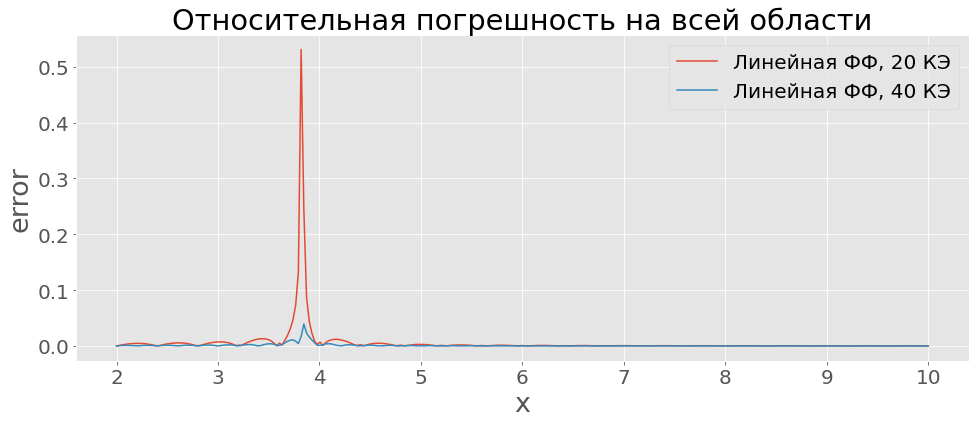

In [210]:
fig = plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 20})
plt.plot(x,(abs(f3 - y)/abs(y)), label='Линейная ФФ, 20 КЭ')
plt.plot(x,(abs(f4 - y)/abs(y)), label='Линейная ФФ, 40 КЭ')
plt.title('Относительная погрешность на всей области')
plt.xlabel('x', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.legend()
plt.savefig('пункт_13б_относительная_линейная.png', dpi=300)
plt.show()

In [191]:
y = Y(x)

Максимальные относительные погрешности на всей расчетной области

In [192]:
max(abs(f1 - y)/abs(y))

0.02356490349923932

In [194]:
max(abs(f2 - y)/abs(y))

0.004400697715771484

In [195]:
max(abs(f3 - y)/abs(y))

0.5310454463673062

In [196]:
max(abs(f4 - y)/abs(y))

0.0392759884286355

### Пункт 15

Посмотрим на максимальную погрешность для 20 КЭ и квадратичной функции формы

In [759]:
print(rf'Погрешность delta_20_s = ', max(abs(f1 - y)/abs(y)))

Погрешность delta_20_s =  0.02356490349923932


Так как для 20 КЭ и квадратичной ФФ используется 41 узел (для каждого КЭ 2 узла + крайние узлы), то перебор количества КЭ для линейной ФФ начнем с 42 и посмотрим, как меняется погрешность в зависимости от кличества КЭ.

In [197]:
N = [42, 46, 50, 52, 58, 62]

In [198]:
knots = 300
x = np.linspace(2, 10, knots, endpoint=True)
y = Y(x)
errors = []
for n in N:
    df = pd.read_csv(f'pow1_N{n}.csv', names=['analystic', 'numerical', 'grid'])
    a = df['analystic'].to_numpy()
    num = df['numerical'].to_numpy()
    grid = df['grid'].to_numpy()
    step = 1
    f5 = []
    for i in range(0, len(num)-1, step):
        u = num[i:i+1+step]
        g = grid[i:i+1+step]
        for j in range(0, knots):
            if x[j] <= grid[i+step] and x[j] >= grid[i]:
                f5.append(Lagrange(x[j], g, u))
    errors.append(max(abs(f5 - y)/abs(y)))

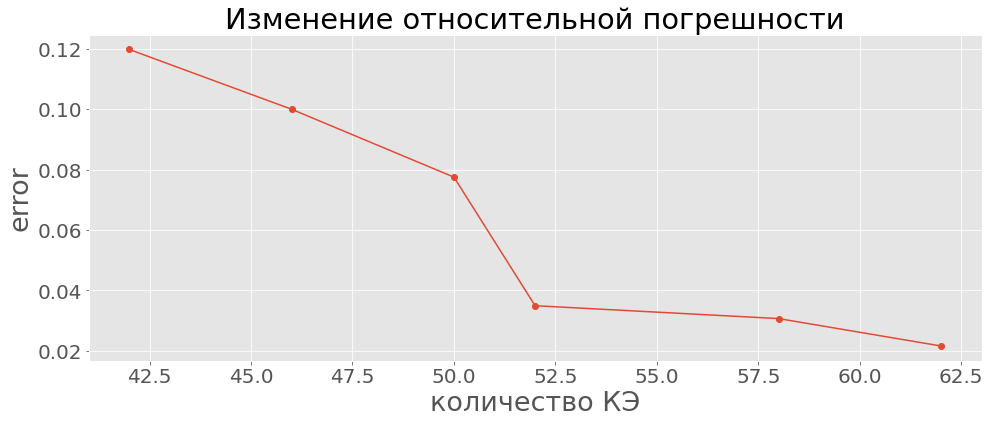

In [202]:
fig = plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 20})
plt.title('Изменение относительной погрешности')
plt.xlabel('количество КЭ', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.plot(N, errors, marker='o')
plt.savefig('пункт_15_изменение.png')
plt.show()

In [205]:
print(rf'Погрешность delta_20_s = ', max(abs(f1 - y)/abs(y)), '\nПогрешность delta_62_l = ', max(abs(f5 - y)/abs(y)))

Погрешность delta_20_s =  0.02356490349923932 
Погрешность delta_62_l =  0.021630047972205028


Продемонстриурем погрешности

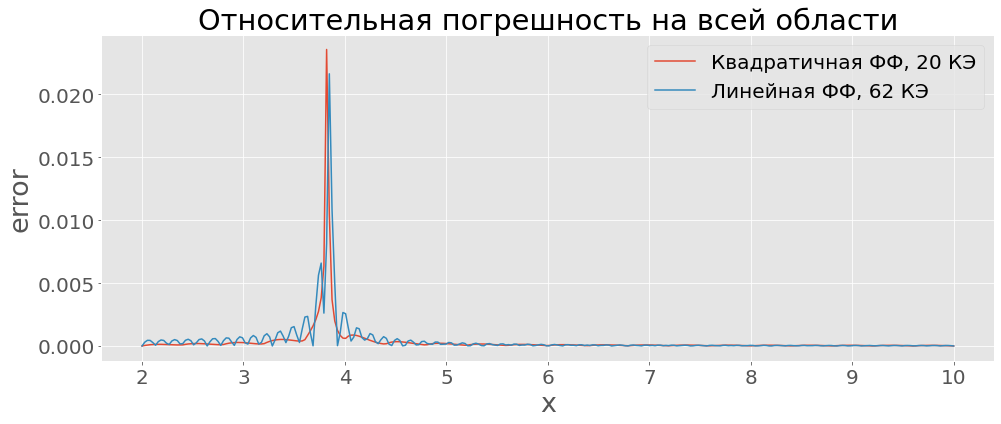

In [206]:
fig = plt.figure(figsize=(16, 6))
plt.title('Относительная погрешность на всей области')
plt.xlabel('x', fontsize=27)
plt.ylabel('error', fontsize=27)
plt.plot(x, abs(f1 - y)/abs(y), label='Квадратичная ФФ, 20 КЭ')
plt.plot(x, abs(f5 - y)/abs(y), label='Линейная ФФ, 62 КЭ')
plt.legend()
plt.savefig('пункт_15.png')
plt.show()

## C implementation -- основной код для метода конечных элементов